/mnt/batch/tasks/shared/LS_root/mounts/clusters/el202/code/Users/el20/DL/ch05
/mnt/batch/tasks/shared/LS_root/mounts/clusters/el202/code/Users/el20/DL
train loss:2.3004382112388977
=== epoch:1, train acc:0.06333333333333334, test acc:0.0578 ===
train loss:2.297587933272185
train loss:2.2823234501413623
train loss:2.3093468590382726
=== epoch:2, train acc:0.06333333333333334, test acc:0.0583 ===
train loss:2.2917941338041974
train loss:2.2804375077482244
train loss:2.303592557489362
=== epoch:3, train acc:0.06333333333333334, test acc:0.0607 ===
train loss:2.3077383222979972
train loss:2.285252107475881
train loss:2.283746118059782
=== epoch:4, train acc:0.06, test acc:0.0629 ===
train loss:2.2822451167016604
train loss:2.3022703963513864
train loss:2.283721428488008
=== epoch:5, train acc:0.06333333333333334, test acc:0.0624 ===
train loss:2.290963529319831
train loss:2.2810351175635097
train loss:2.2855994709062024
=== epoch:6, train acc:0.06333333333333334, test acc:0.0624 ===
train 

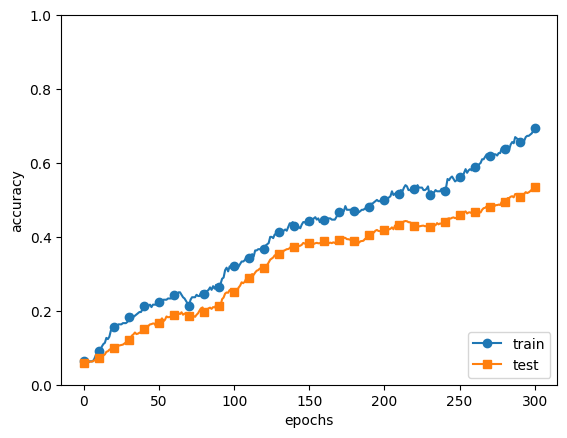

In [1]:
import os, sys
print(os.getcwd())
current_dir = os.path.dirname(os.getcwd())
print(current_dir)
os.chdir(current_dir)

import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.multi_layer_net_extend import MultiLayerNetExtend
from common.trainer import Trainer

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

# 오버피팅을 재현하기 위해 학습 데이터 수를 줄임
x_train = x_train[:300]
t_train = t_train[:300]

# 드롭아웃 사용 유무와 비울 설정 ========================
use_dropout = True  # 드롭아웃을 쓰지 않을 때는 False
dropout_ratio = 0.2
# ====================================================

network = MultiLayerNetExtend(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100],
                              output_size=10, use_dropout=use_dropout, dropout_ration=dropout_ratio)
trainer = Trainer(network, x_train, t_train, x_test, t_test,
                  epochs=301, mini_batch_size=100,
                  optimizer='sgd', optimizer_param={'lr': 0.01}, verbose=True)
trainer.train()

train_acc_list, test_acc_list = trainer.train_acc_list, trainer.test_acc_list

# 그래프 그리기==========
markers = {'train': 'o', 'test': 's'}
x = np.arange(len(train_acc_list))
plt.plot(x, train_acc_list, marker='o', label='train', markevery=10)
plt.plot(x, test_acc_list, marker='s', label='test', markevery=10)
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()
